# **Airline Passenger Satisfaction**

### Độ hài lòng của các khách hàng trong một hãng hàng không

*Language used: English*

*Author: Hoang Anh Tuan*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

## Data Import and Initial View

In [ ]:
# Importing Data
link = 'https://drive.google.com/file/d/1zpfqnIsYBmlJ169W_UWKOM0I7mYZE2qa/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
set1 = pd.read_csv(path)      # Dataset 1

link = 'https://drive.google.com/file/d/1lTR8gDU7aM-HfWZ9ydU1yKkVrjMXXW6V/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
set2 = pd.read_csv(path)      # Dataset 2

It is worth noting that there are two split Datasets that share the same fields but not the same records. The original author divided at first since he needed to work with Training and Testing data.

Now I will need to use concat to merge the 2 sets.

In [ ]:
# Concatenating Data
air_df = pd.concat([set1, set2])
air_df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [ ]:
# List all column names
air_df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

**In total, there are 129,880 rows and 25 columns. Each row is the information and numeral scores.**

With the combination of multiple scoring and type of experiences a passenger, each row will has its own 'Satisfaction' classifier column, which indicates the overall satisfaction.

In [ ]:
# Show info
air_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

In [ ]:
# Show description
air_df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,44158.700000,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,31207.377062,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16234.750000,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,38963.500000,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,71433.250000,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [ ]:
# Check uniques for each column
rating_column = []    # To collect the columns contain rating
class_column = []     # To collect the columns contain classes
value_column = []     # To collect the columns contain values

for i in air_df.columns:
  unique_values = air_df[i].unique()
  null_count = air_df[i].isnull().sum()

  # Count uniques
  if len(unique_values) > 10:
    unique_values = list(unique_values[:6]) + [f"+{len(unique_values) - 5}"]

  # Special cases
  if len(unique_values) == 6:
    rating_column.append(i)
  elif len(unique_values) < 6:
    class_column.append(i)
  else:
    value_column.append(i)

  print(f"{i} - Unique values: ", unique_values)
  print("Number of NULL values: ", null_count)
  print("-"*30)

Unnamed: 0 - Unique values:  [0, 1, 2, 3, 4, 5, '+103899']
Number of NULL values:  0
------------------------------
id - Unique values:  [19556, 90035, 12360, 77959, 36875, 39177, '+129875']
Number of NULL values:  0
------------------------------
Gender - Unique values:  ['Female' 'Male']
Number of NULL values:  0
------------------------------
Customer Type - Unique values:  ['Loyal Customer' 'disloyal Customer']
Number of NULL values:  0
------------------------------
Age - Unique values:  [52, 36, 20, 44, 49, 16, '+70']
Number of NULL values:  0
------------------------------
Type of Travel - Unique values:  ['Business travel' 'Personal Travel']
Number of NULL values:  0
------------------------------
Class - Unique values:  ['Eco' 'Business' 'Eco Plus']
Number of NULL values:  0
------------------------------
Flight Distance - Unique values:  [160, 2863, 192, 3377, 1182, 311, '+3816']
Number of NULL values:  0
------------------------------
Inflight wifi service - Unique values:  

In [ ]:
# List several types of attribute
print("Columns that used to collect ratings and scores are: ")
print(list(rating_column))
print()
print("Columns that used to collect class values: ")
print(list(class_column))
print()
print("Columns that used to collect multiple values: ")
print(list(value_column))

Columns that used to collect ratings and scores are: 
['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Checkin service', 'Inflight service', 'Cleanliness']

Columns that used to collect class values: 
['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Baggage handling', 'satisfaction']

Columns that used to collect multiple values: 
['Unnamed: 0', 'id', 'Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


In [ ]:
# Check duplication
duplicates = air_df.duplicated(subset=None, keep='first')
duplicates_count = duplicates.sum()
print(f"Count of duplications in the dataset: {duplicates_count}")

Count of duplications in the dataset: 0


**The dataset is free in duplications**

## Interactive EDA

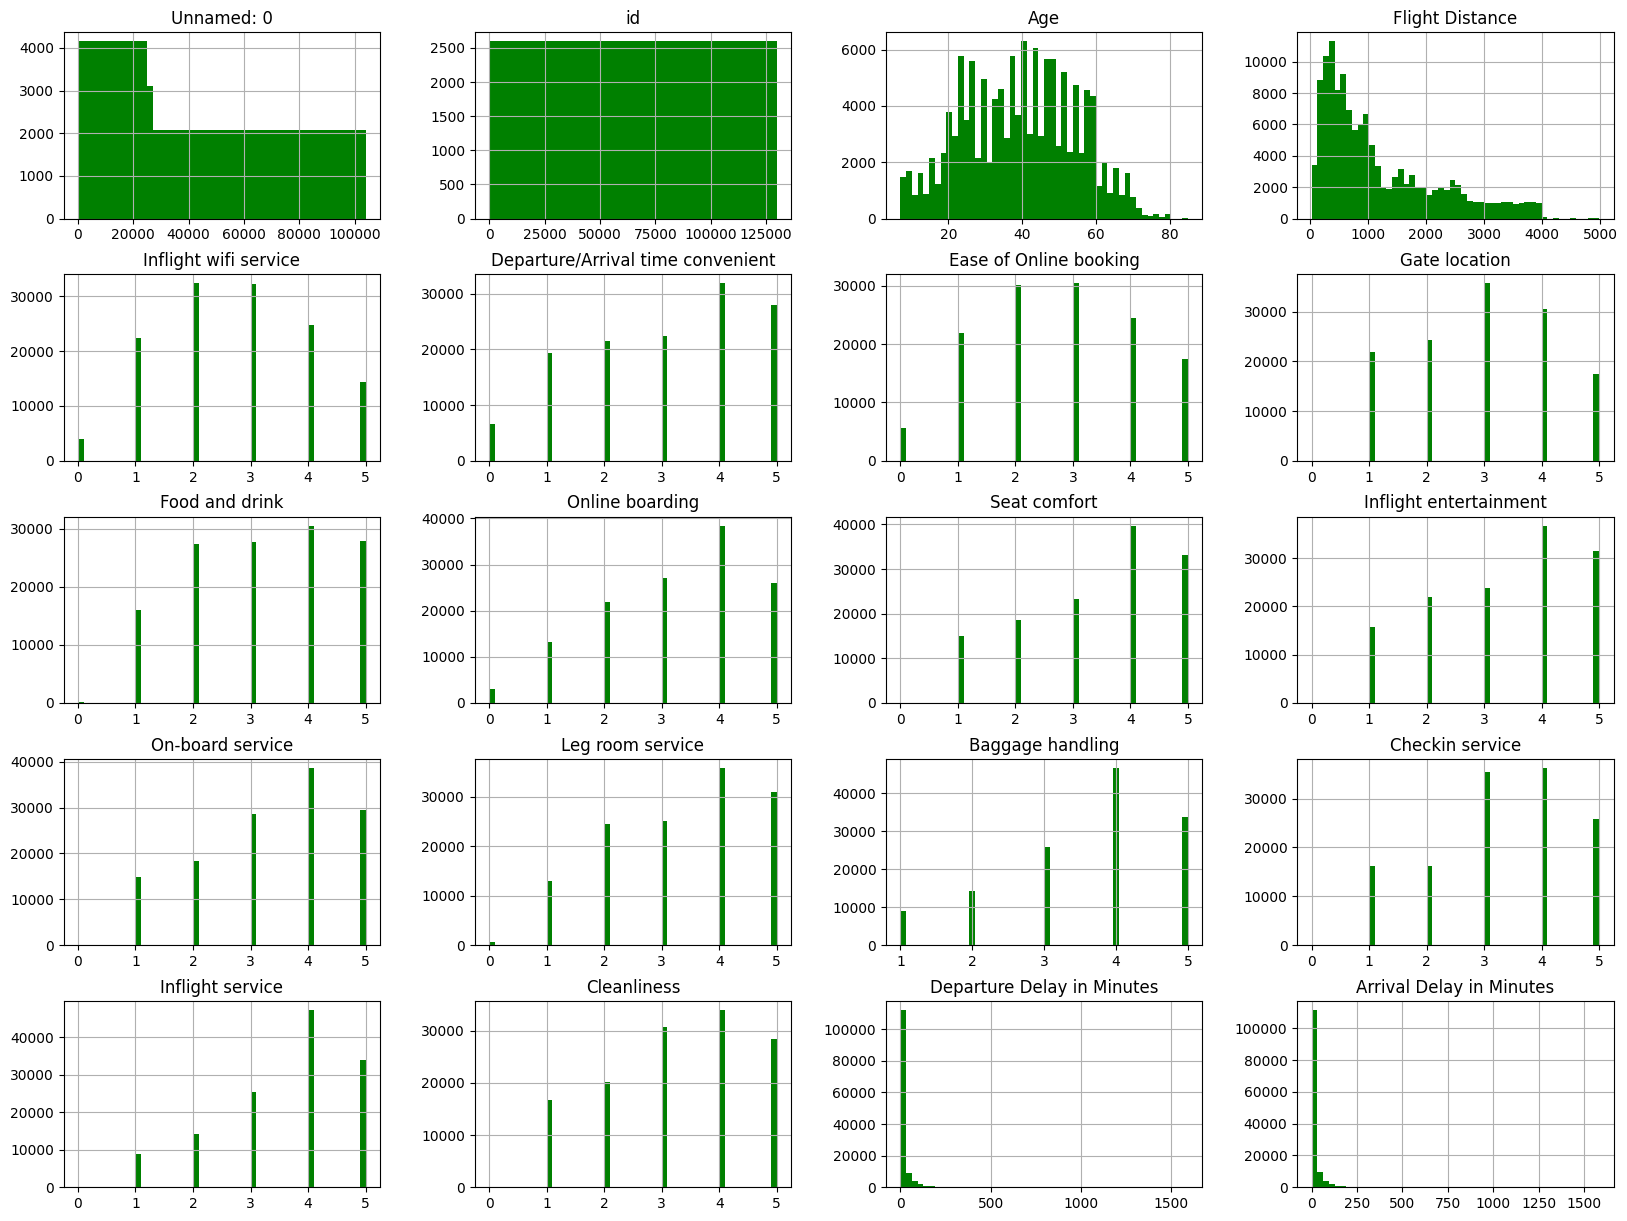

In [ ]:
# Distribution of data using Histogram
air_df.hist(bins=50, figsize=(20,15), color='green')
plt.show()

<ipython-input-41-24839fdc081b>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(air_df.corr(), annot=True, cmap='inferno', fmt=".2f", square=True)


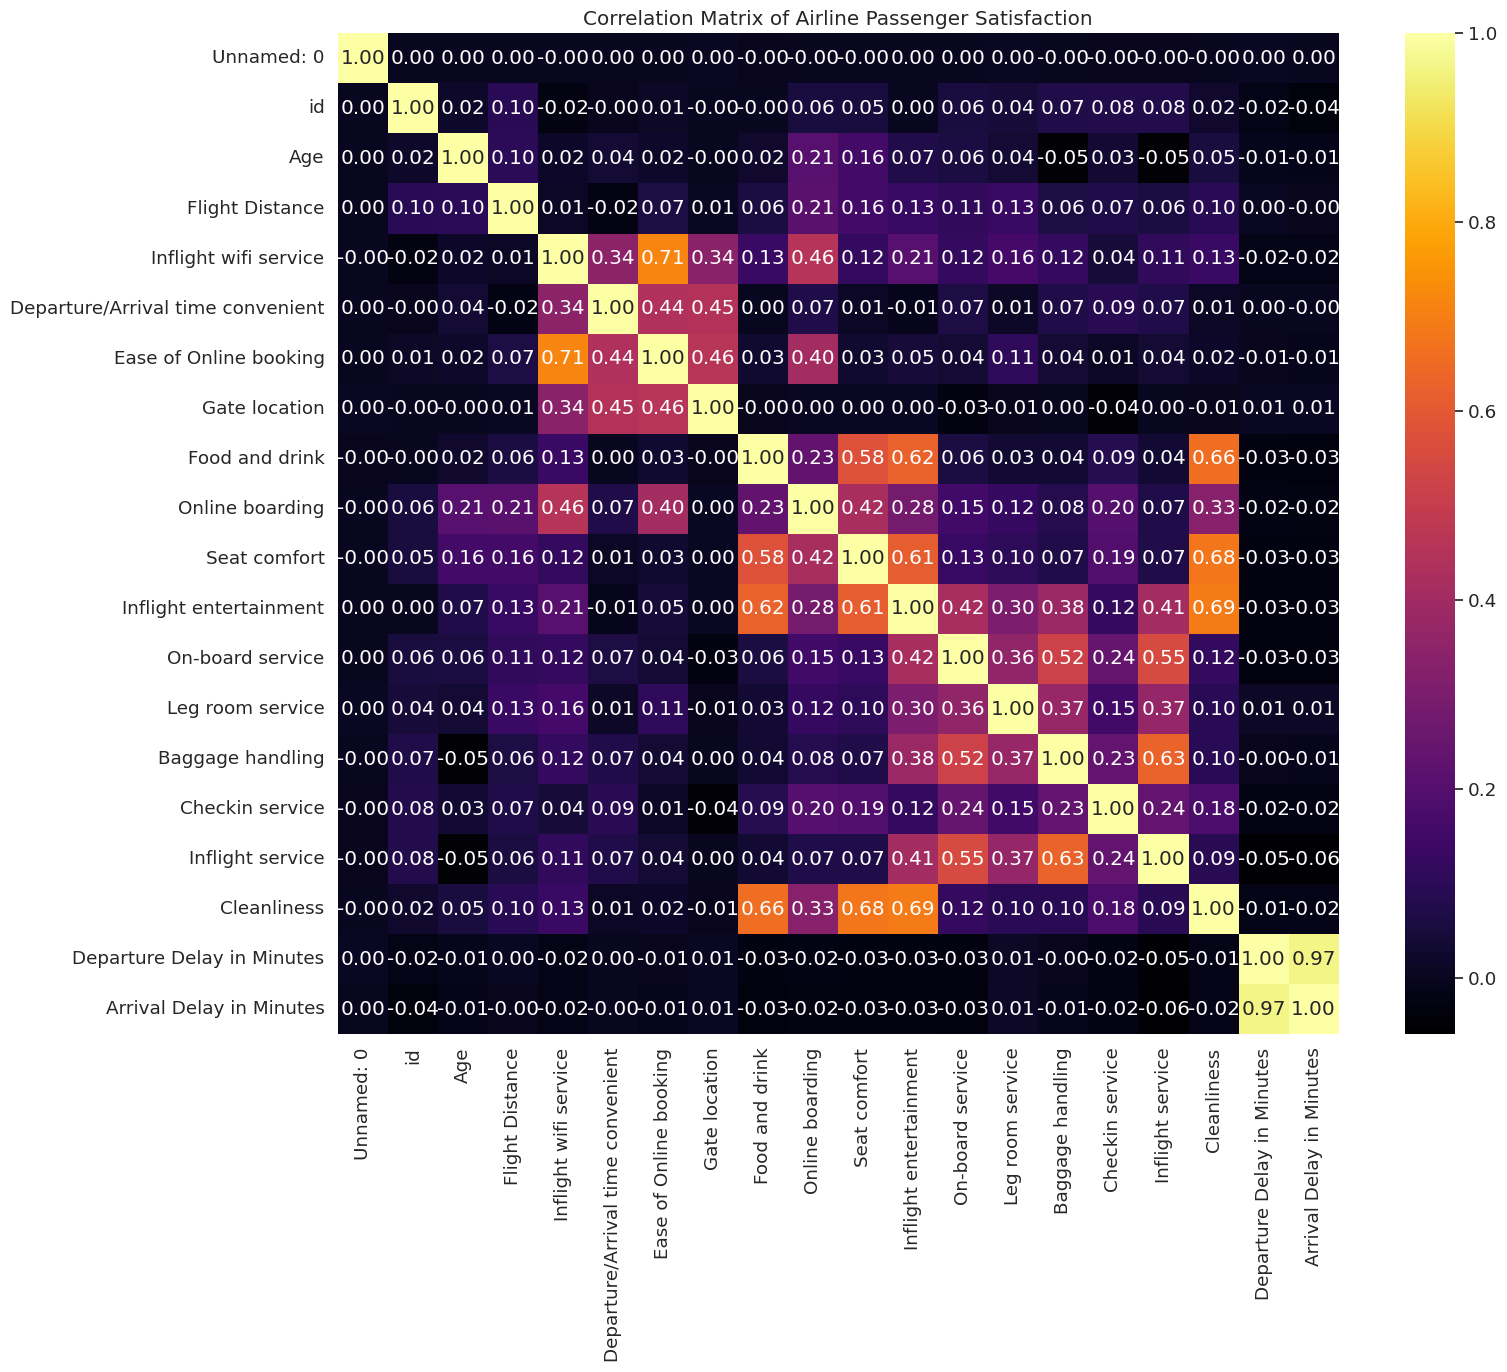

In [ ]:
# Create heatmap to visualize
plt.figure(figsize=(17, 13))    # Change size of figure
# sns.set(font_scale=0.8)         # Font size
sns.heatmap(air_df.corr(), annot=True, cmap='inferno', fmt=".2f", square=True)

# Display Plot
plt.title("Correlation Matrix of Airline Passenger Satisfaction")
plt.show()

**Overview Assumptions based on the Correlation Matrix:**

  - First column (Unnamed: 0) has absolute no connection to any other columns
  - Most of the score rating field are related to each other
  - Wifi, time departure/arrival and Gate Location are connect heavily
  - Departure Delay and Arrival Delay are almost twins, with relation score of 97%
  - The datasets primary consist of categorical features
  - Flight Distance Distribution: The distribution of flight distance is right-skewed.

In [26]:
# Removing redundant columns
air_df = air_df.drop("Unnamed: 0", axis=1)
air_df = air_df.drop("id", axis=1)

In [27]:
# Remove all rows contain Null values
air_df.dropna(axis=0, inplace=True)

In [28]:
# Encoding the target columns
air_df['satisfaction'] = air_df['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1})

0    73225
1    56262
Name: satisfaction, dtype: int64

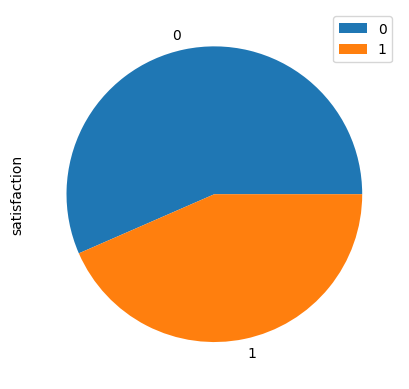

In [29]:
# View the distribution of the target columns
air_df['satisfaction'].value_counts().plot.pie(legend = [0,1])
air_df['satisfaction'].value_counts()

**The target columns are not too imbalanced, so there is no need for the balancing technique.**

## Data Cleaning

### Check and Handling Outliers

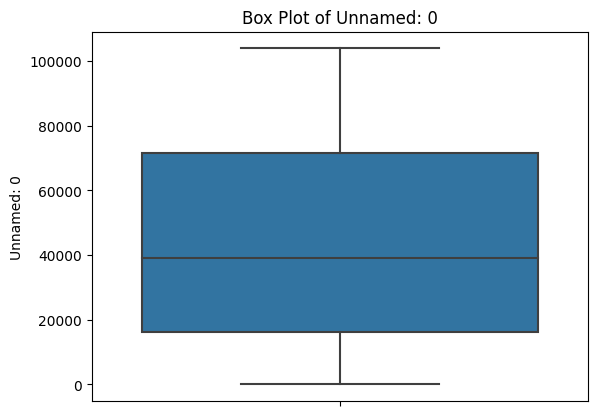

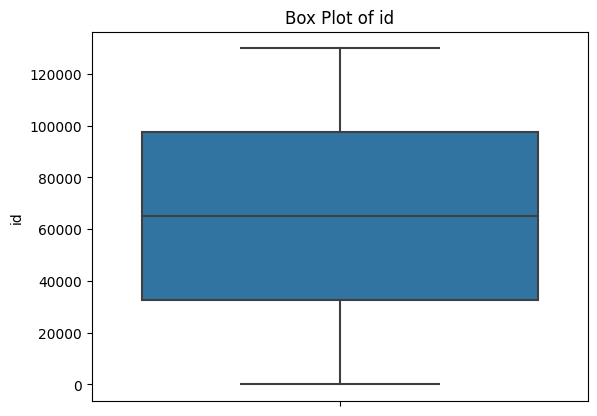

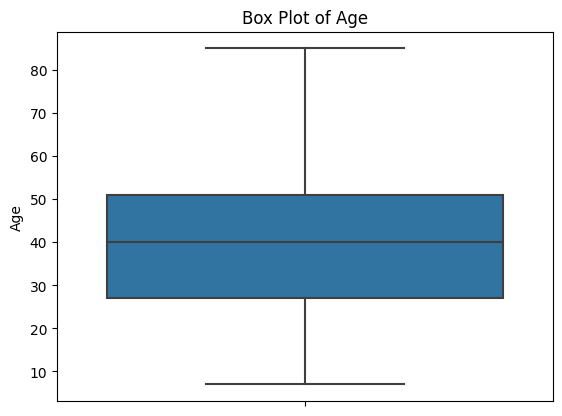

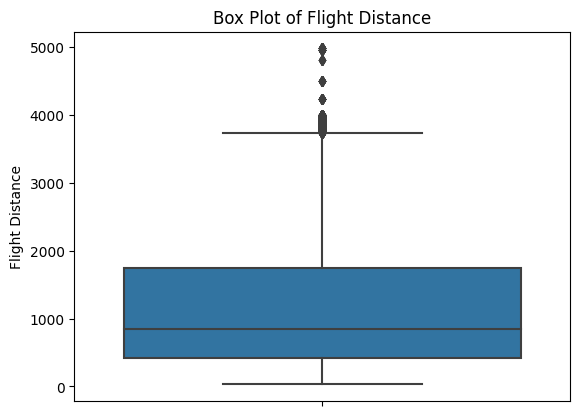

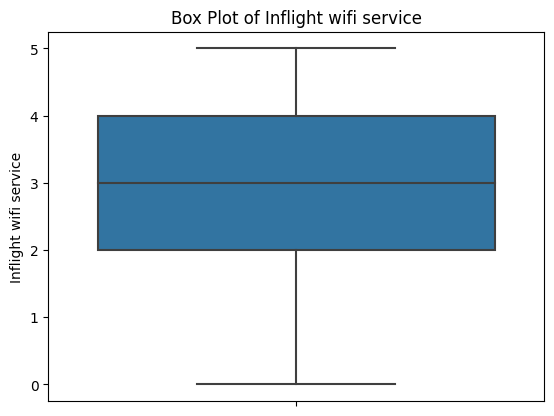

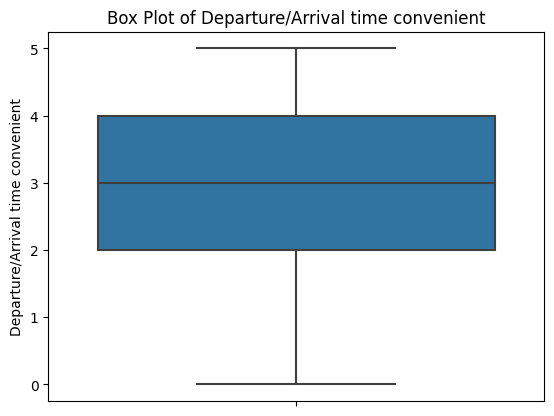

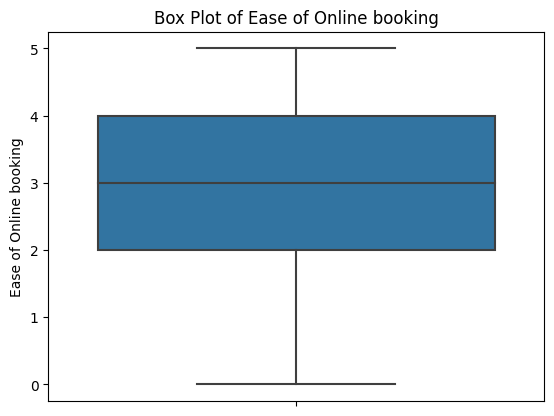

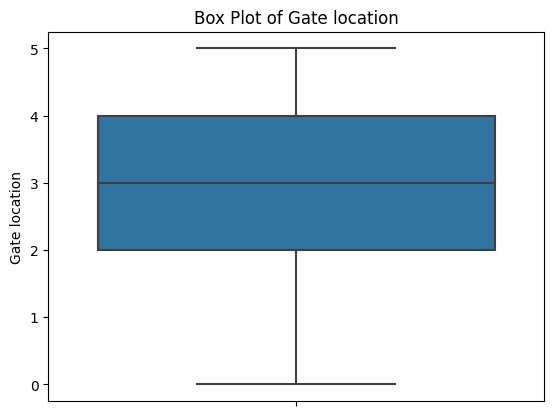

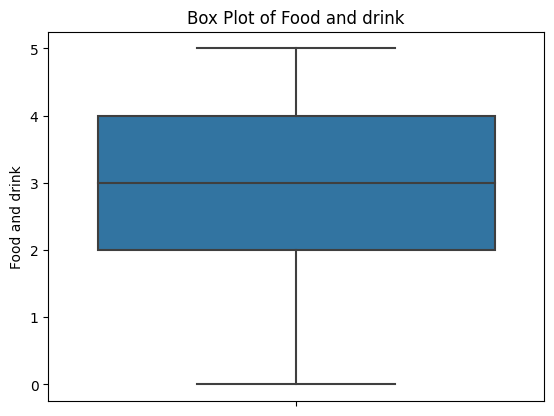

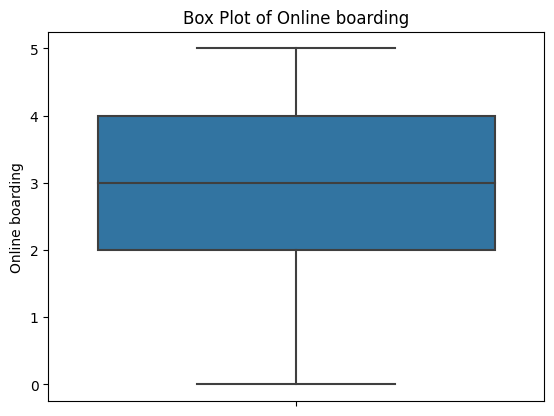

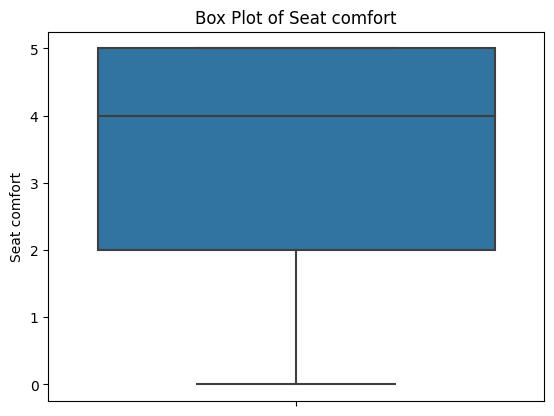

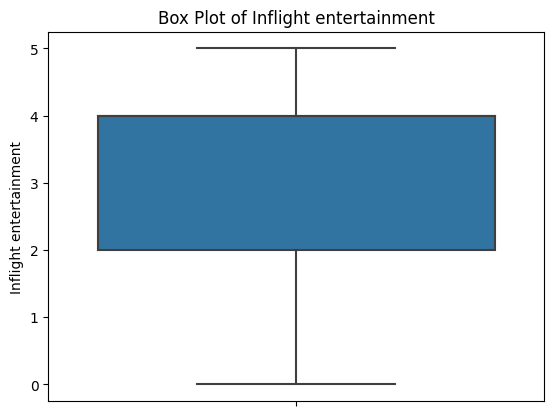

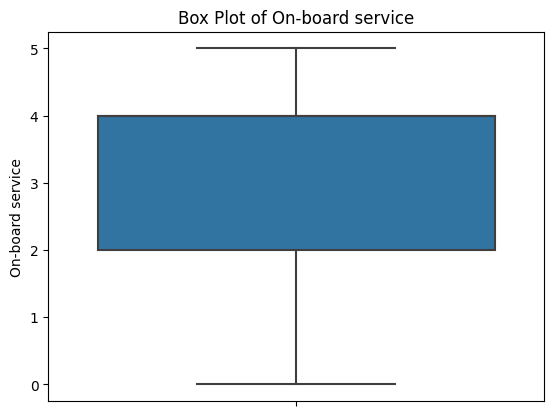

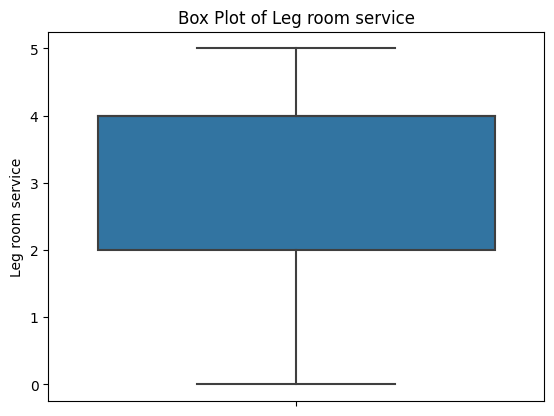

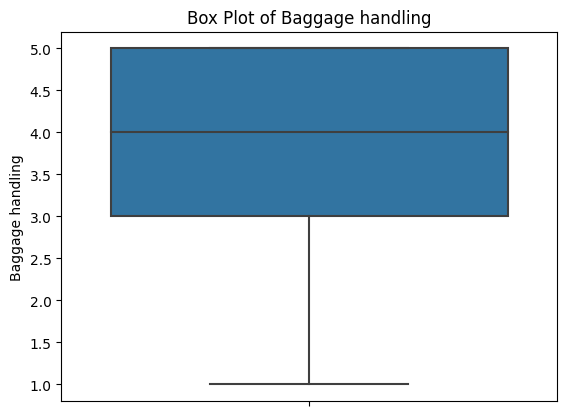

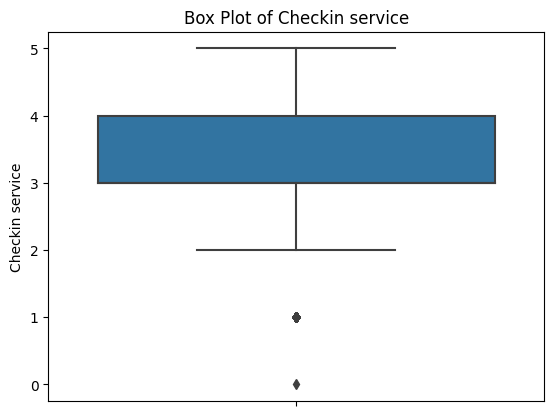

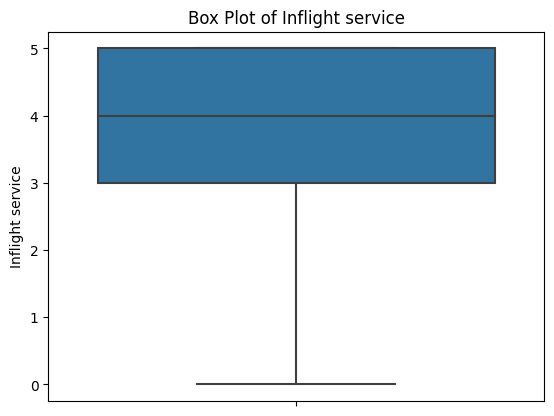

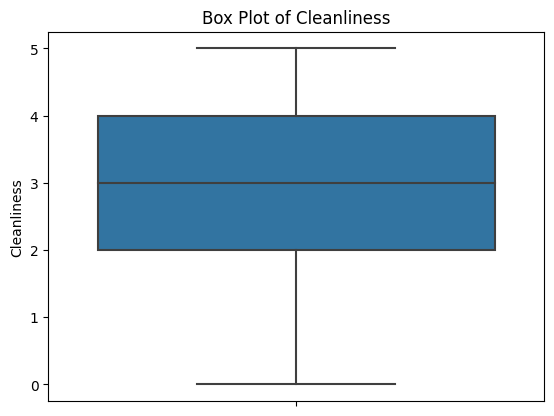

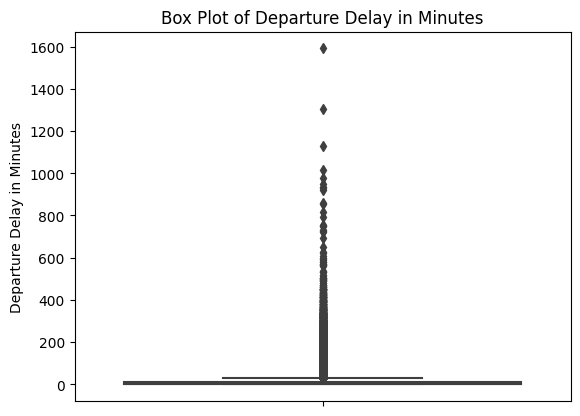

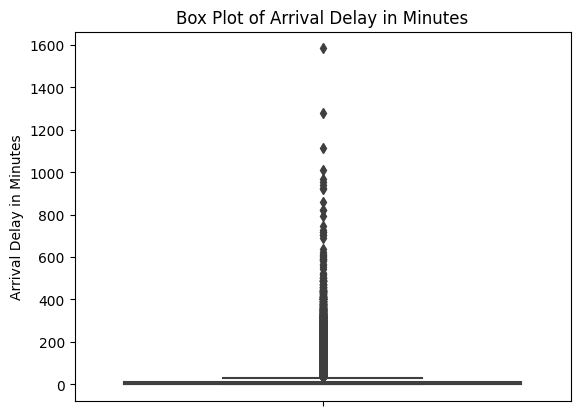

In [ ]:
# Get all the columns with numeric type to create plots
numeric_col = air_df.select_dtypes(include=['number']).columns

# Create figure
plt.figsize=(10,8)

# Use loop to go through all numeric columns
for i in numeric_col:
  sns.boxplot(data=air_df, y=i)
  plt.title(f"Box Plot of {i}")
  plt.ylabel(i)
  plt.show()

In [58]:
# Calculate then print the outlier for each row

def calculate_outliers_percentage(df):
    # Calculate the interquartile range (IQR) for each column
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Initialize a DataFrame to store the percentage of outliers
    outliers = pd.DataFrame(columns=['Column Name', '% Outliers'])

    # Iterate over columns and calculate the percentage of outliers
    for column in df.columns:
        # Check if the column is numeric (not categorical)
        if np.issubdtype(df[column].dtype, np.number):
            num_outliers = np.sum((np.asarray(df[column]) < lower_bound[column]) | (np.asarray(df[column]) > upper_bound[column]))
            pct_outliers = round(num_outliers / len(df) * 100, 4)
            outliers = outliers.append({'Column Name': column, '% Outliers': pct_outliers}, ignore_index=True)

    return outliers

# Calculate and display the outliers percentage
outliers = calculate_outliers_percentage(air_df)
outliers.set_index('Column Name', inplace=True)
print(outliers)

                                   % Outliers
Column Name                                  
Gender                                 0.0000
Customer Type                         18.3138
Age                                    0.0000
Type of Travel                         0.0000
Class                                  0.0000
Flight Distance                        2.1987
Inflight wifi service                  0.0000
Departure/Arrival time convenient      0.0000
Ease of Online booking                 0.0000
Gate location                          0.0000
Food and drink                         0.0000
Online boarding                        0.0000
Seat comfort                           0.0000
Inflight entertainment                 0.0000
On-board service                       0.0000
Leg room service                       0.0000
Baggage handling                       0.0000
Checkin service                       12.4020
Inflight service                       0.0000
Cleanliness                       

<ipython-input-58-740f644e3855>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append({'Column Name': column, '% Outliers': pct_outliers}, ignore_index=True)
<ipython-input-58-740f644e3855>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append({'Column Name': column, '% Outliers': pct_outliers}, ignore_index=True)
<ipython-input-58-740f644e3855>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append({'Column Name': column, '% Outliers': pct_outliers}, ignore_index=True)
<ipython-input-58-740f644e3855>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers

In [22]:
# Encoding all other categorical columns
air_df['Customer Type'] = air_df['Customer Type'].replace({'Loyal Customer': 1, 'disloyal Customer': 0})
air_df['Type of Travel'] = air_df['Type of Travel'].replace({'Business travel': 1, 'Personal Travel': 0})
air_df['Class'] = air_df['Class'].replace({'Business': 2, 'Eco': 1,'Eco Plus':0})
air_df['Gender'] = air_df['Gender'].replace({'Female': 1, 'Male':0,})

In [23]:
# See the sample to final check
air_df.sample(2)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
91769,91769,85633,1,1,44,0,1,259,3,3,...,4,4,3,4,4,4,2,23,10.0,neutral or dissatisfied
68798,68798,27010,1,1,58,1,1,954,4,1,...,4,4,4,4,2,4,4,0,0.0,satisfied


## Apply Machine Learning Models

In [32]:
# Splitting the train/test set
from sklearn.model_selection import train_test_split
x = air_df.drop(['satisfaction','Arrival Delay in Minutes'], axis=1)
y = air_df['satisfaction']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [33]:
# Using RobustScaler to scale the data
from sklearn.preprocessing import RobustScaler

# Initialize the RobustScaler
scaler = RobustScaler()

# Fit and transform the scaler on the training data
x_train = scaler.fit_transform(x_train)

# Transform the testing data using the same scaler
x_test = scaler.transform(x_test)

###Running 10 Classifier at once

In [59]:
import pandas as pd
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from tabulate import tabulate

# Create a list of classifiers
classifiers = [
    ("Logistic Regression", LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("Gaussian Naive Bayes", GaussianNB()),
    ("Multi-layer Perceptron", MLPClassifier()),
    ("XGBoost", XGBClassifier()),
    ("CatBoost", CatBoostClassifier()),
    ("AdaBoost", AdaBoostClassifier())
]

# Initialize an empty DataFrame to store the results
results_df = pd.DataFrame(columns=["Classifier", "Balanced Accuracy", "Training Accuracy", "Testing Accuracy", "F1 Score", "Precision", "Recall"])

# Train and evaluate each classifier
for name, clf in classifiers:
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    y_prob = clf.predict_proba(x_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_prob)
    accuracy_train = accuracy_score(y_train, clf.predict(x_train))
    accuracy_test = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    results_df = results_df.append({
        "Classifier": name,
        "Balanced Accuracy": auc_score,
        "Training Accuracy": accuracy_train,
        "Testing Accuracy": accuracy_test,
        "F1 Score": f1,
        "Precision": precision,
        "Recall": recall
    }, ignore_index=True)

# Sort the DataFrame by Balanced Accuracy in descending order
results_df = results_df.sort_values(by="Balanced Accuracy", ascending=False)

# Print the results table with styling
styled_results = results_df.style.background_gradient(cmap='Blues', subset=["Balanced Accuracy", "Training Accuracy", "Testing Accuracy", "F1 Score", "Precision", "Recall"])
styled_results = styled_results.hide_index()

# print(styled_results)

<ipython-input-59-57024cf8b524>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-59-57024cf8b524>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-59-57024cf8b524>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-59-57024cf8b524>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-59-57024cf8b524>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = 

Learning rate set to 0.074726
0:	learn: 0.5928994	total: 26.2ms	remaining: 26.1s
1:	learn: 0.5159459	total: 52ms	remaining: 25.9s
2:	learn: 0.4363668	total: 76.7ms	remaining: 25.5s
3:	learn: 0.3861917	total: 106ms	remaining: 26.4s
4:	learn: 0.3491279	total: 132ms	remaining: 26.2s
5:	learn: 0.3195938	total: 158ms	remaining: 26.1s
6:	learn: 0.2969986	total: 182ms	remaining: 25.9s
7:	learn: 0.2794900	total: 214ms	remaining: 26.6s
8:	learn: 0.2618298	total: 241ms	remaining: 26.5s
9:	learn: 0.2491241	total: 266ms	remaining: 26.3s
10:	learn: 0.2378940	total: 299ms	remaining: 26.9s
11:	learn: 0.2273599	total: 326ms	remaining: 26.9s
12:	learn: 0.2188713	total: 353ms	remaining: 26.8s
13:	learn: 0.2070079	total: 379ms	remaining: 26.7s
14:	learn: 0.1999945	total: 405ms	remaining: 26.6s
15:	learn: 0.1913133	total: 435ms	remaining: 26.7s
16:	learn: 0.1869993	total: 460ms	remaining: 26.6s
17:	learn: 0.1799285	total: 484ms	remaining: 26.4s
18:	learn: 0.1741137	total: 509ms	remaining: 26.3s
19:	learn:

<ipython-input-59-57024cf8b524>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-59-57024cf8b524>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-59-57024cf8b524>:57: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  styled_results = styled_results.hide_index()


In [35]:
# Show the chart for comparsion
styled_results

Classifier,Balanced Accuracy,Training Accuracy,Testing Accuracy,F1 Score,Precision,Recall
CatBoost,0.995550,0.974814,0.964824,0.959606,0.973900,0.945726
XGBoost,0.995206,0.974186,0.963202,0.957744,0.972010,0.943891
Random Forest,0.994404,0.999990,0.963433,0.957891,0.975016,0.941356
Multi-layer Perceptron,0.994095,0.967921,0.959688,0.953612,0.969902,0.937861
Gradient Boosting,0.987861,0.942533,0.941772,0.932858,0.950808,0.915574
AdaBoost,0.977418,0.926894,0.927137,0.916486,0.928360,0.904912
K-Nearest Neighbors,0.967475,0.946153,0.923353,0.910323,0.942205,0.880528
Decision Tree,0.945591,1.000000,0.945942,0.939051,0.935548,0.942580
Logistic Regression,0.924943,0.875025,0.872577,0.851859,0.875761,0.829226
Gaussian Naive Bayes,0.921963,0.865169,0.861727,0.838293,0.867233,0.811222


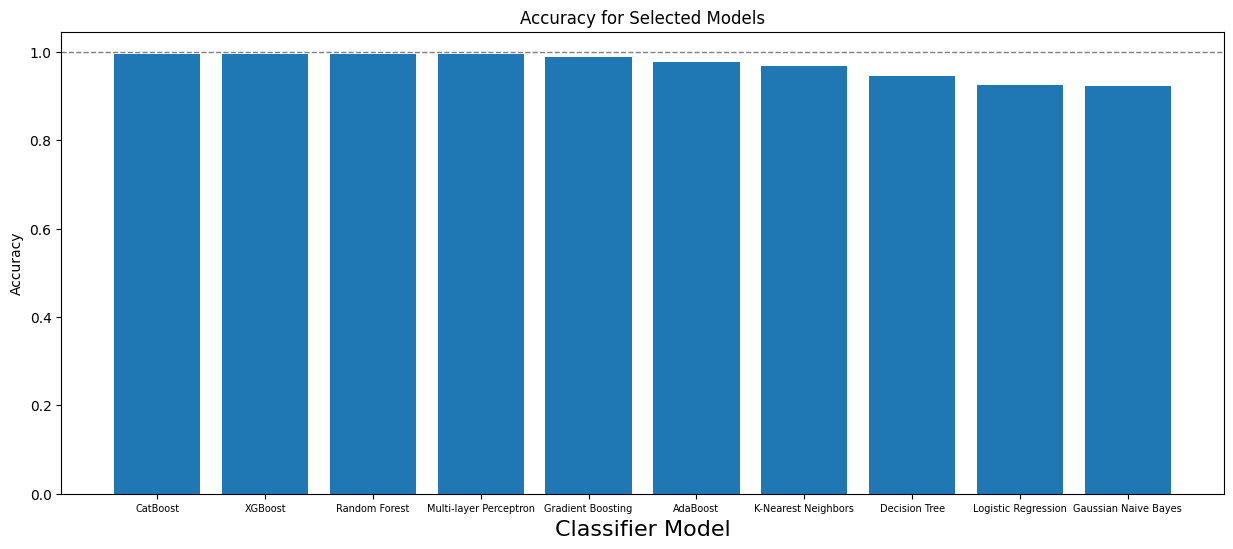

In [52]:
# Create a bar chart for the filtered rows
plt.figure(figsize=(15,6))
plt.bar(results_df['Classifier'], results_df['Balanced Accuracy'])

# Add labels and title
plt.xlabel('Classifier Model', fontsize=16)
plt.xticks(fontsize=7)
plt.ylabel('Accuracy')
plt.title('Accuracy for Selected Models')
plt.axhline(y=1.0, color='gray', linestyle='--', linewidth=1)

# Show the chart
plt.show()

**It is clear that CatBoost is the best model out of them all with the Accuracy rate of 99.56%. Following by XGBoost, Random Forest and Multi-Layer Perception which have a rate of more than 99%.**

*The least accurate model is Gaussian Naive Bayes with 92%*

Now, I will visualize the 2 best models

### Visualize Catboost and XGBoost

AUC Score: 0.9941


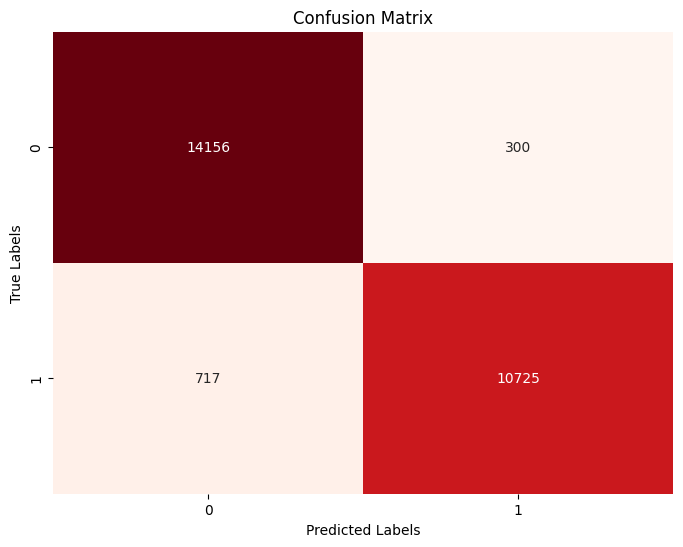

In [54]:
# CONFUSION MATRIX

from catboost import CatBoostClassifier, Pool
from sklearn.metrics import roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a CatBoost classifier
catboost_model = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, loss_function='Logloss', verbose=0)

# Train the model
catboost_model.fit(x_train, y_train)

# Make predictions
y_pred = catboost_model.predict(x_test)
y_prob = catboost_model.predict_proba(x_test)[:, 1]

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc_score:.4f}")

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

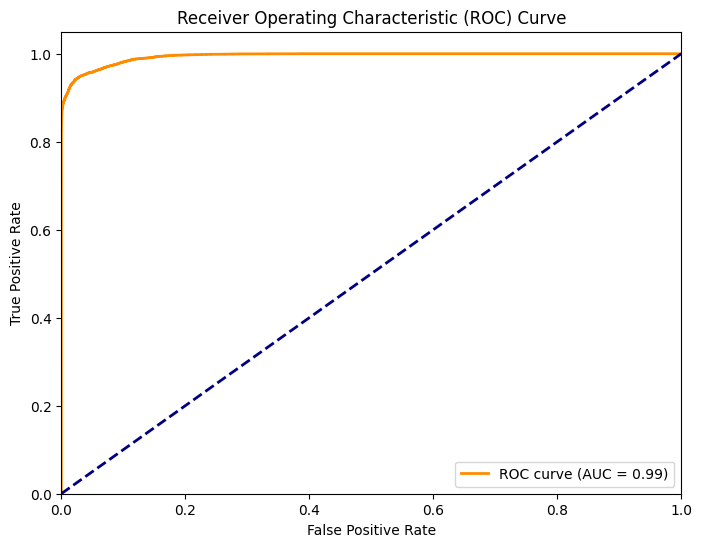

In [55]:
# ROC CURVES

from catboost import CatBoostClassifier, Pool
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Create a CatBoost classifier
catboost_model = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, loss_function='Logloss', verbose=0)

# Train the model
catboost_model.fit(x_train, y_train)

# Make predictions
y_prob = catboost_model.predict_proba(x_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()